# Example 4 - Spatial variation of Curie depth

In Example 2 and 3 we computed the Curie depth for a single point using a fixed window. Here, compute the Curie depth over a magnetic anomaly and estimate its uncertainty.

### Contents

- [Optimisation routine](#Optimisation-routine)
- [Uncertainty analysis](#Uncertainty-analysis)
- [Sensitivity analysis](#Sensitivity-analysis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pycurious

In [2]:
# load x,y,anomaly
mag_data = np.loadtxt("../../data/test_mag_data.txt")

nx, ny = 305, 305

x = mag_data[:,0]
y = mag_data[:,1]
d = mag_data[:,2].reshape(ny,nx)

xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# initialise CurieOptimise object
grid = pycurious.CurieOptimise(d, xmin, xmax, ymin, ymax)

In [3]:
print(d)

[[-3.39850758e-07 -1.15445653e-07  4.78583802e-08 ... -6.20256491e-07
  -5.65625376e-07 -2.87808734e-07]
 [-6.01454032e-07 -3.77845808e-07 -8.82566016e-08 ... -4.37467770e-07
  -2.07393080e-07 -1.88743453e-07]
 [-5.49250299e-07 -8.00927786e-07 -3.06631330e-07 ... -3.31048195e-07
  -5.43826584e-07 -4.31303178e-07]
 ...
 [-9.13415530e-08  5.05615011e-07  8.78630812e-07 ... -1.16656054e-06
  -4.52008543e-07 -1.89765903e-07]
 [ 7.90149022e-09  4.73298333e-07  9.92811156e-07 ... -1.37619834e-06
  -6.55068463e-07 -1.39812641e-07]
 [-1.32257782e-07  1.54322571e-07  4.79486434e-07 ... -1.05693748e-06
  -1.03095015e-06 -5.07497265e-07]]


In [52]:
mag_data2 = np.loadtxt("../../data/mag.grd")

In [57]:
d2=np.fliplr(mag_data2.T)

[[ 1.39056823e-14 -1.31215548e-15  1.59542071e-15 ...  2.38701406e-14
   9.05733178e-15  1.14795670e-14]
 [-1.28865393e-14  1.38430139e-14 -3.12177024e-15 ...  6.24953805e-15
   6.31522291e-15  3.27986758e-15]
 [-2.56399718e-14  2.20405994e-14  5.77307370e-15 ...  3.65652789e-15
  -2.49069611e-14  1.38713794e-14]
 ...
 [ 1.81228090e-15  1.97155303e-14 -1.65162127e-14 ... -7.67127332e-15
   6.61043644e-15 -4.18502817e-15]
 [ 8.98513608e-17 -9.44243160e-15  3.22728610e-14 ...  4.03525560e-14
  -1.53892408e-14  9.62217146e-16]
 [-3.82821305e-17 -6.52714605e-15 -2.50131017e-14 ... -4.47312596e-14
  -4.36851580e-14 -1.75351728e-14]]


## Optimisation routine

Here we iteratively evaluate the Curie depth across the magnetic anomaly. We use gradient-based inversion which is deterministic, because it doesn't include uncertainty, but a quick means to recover Curie depth from the magnetic anomaly.

In [3]:
# get centroids

window_size = 50e3
xc_list, yc_list = grid.create_centroid_list(window_size, spacingX=10e3, spacingY=10e3)

print("number of centroids = {}".format(len(xc_list)))

number of centroids = 676


In [4]:
# no priors
grid.reset_priors()

beta, zt, dz, C = grid.optimise_routine(window_size, xc_list, yc_list)

D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.

D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.

D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.

D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.

D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.1.1-py3.7-win-amd64.egg\pycurious\grid\curie.py:228: RuntimeWarning: divide by zero encountered in log
  rr = 2.0*np.log(FT[mask])
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
D:\Anaconda3\lib\site-packages\pycurious-0.

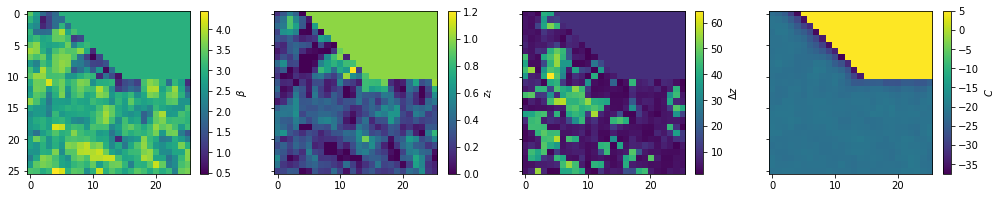

In [5]:
# get dimensions of domain
xcoords = np.unique(xc_list)
ycoords = np.unique(yc_list)
nc, nr = xcoords.size, ycoords.size


# plot results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(17,3.))

im1 = ax1.imshow(beta.reshape(nr,nc))
im2 = ax2.imshow(zt.reshape(nr,nc))
im3 = ax3.imshow(dz.reshape(nr,nc))
im4 = ax4.imshow(C.reshape(nr,nc))

fig.colorbar(im1, ax=ax1, label=r"$\beta$")
fig.colorbar(im2, ax=ax2, label=r"$z_t$")
fig.colorbar(im3, ax=ax3, label=r"$\Delta z$")
fig.colorbar(im4, ax=ax4, label=r"$C$")

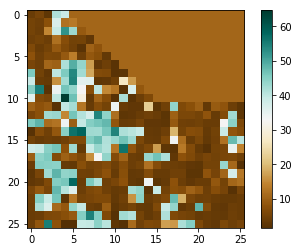

In [6]:
# plot Curie depth

curie_depth = zt + dz

fig = plt.figure()
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(curie_depth.reshape(nr,nc), cmap=plt.cm.BrBG)
fig.colorbar(im1)